In [1]:
# CVIA Lab Week2 - Homework example code
# Author: Min Wang
# Created: 2026/02/10

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

In [2]:
# Load Image
img = cv2.imread("chocolate_original.jpg")  # Replace with your image path
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# Convert to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

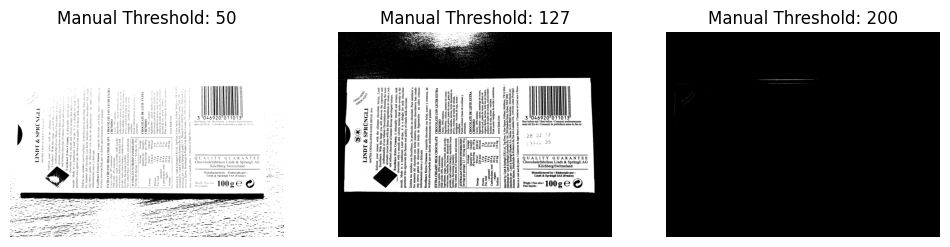

In [3]:
# Manual Thresholding

# Define three thresholds: low, medium, high (0-255)
thresh_low = 50
thresh_med = 127
thresh_high = 200

binary_low  = img_gray > thresh_low
binary_med  = img_gray > thresh_med
binary_high = img_gray > thresh_high

# Display manual thresholds
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(binary_low, cmap='gray')
plt.title(f'Manual Threshold: {thresh_low}')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_med, cmap='gray')
plt.title(f'Manual Threshold: {thresh_med}')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(binary_high, cmap='gray')
plt.title(f'Manual Threshold: {thresh_high}')
plt.axis('off')
plt.show()

Automatically computed Otsu threshold: 105.00


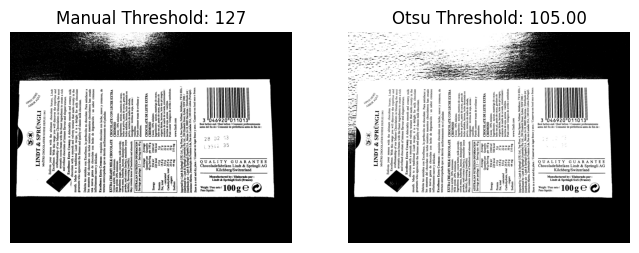

In [4]:
# Automatic Thresholding (Otsu)

otsu_thresh = threshold_otsu(img_gray)
binary_otsu = img_gray > otsu_thresh

print(f"Automatically computed Otsu threshold: {otsu_thresh:.2f}")

# Display Otsu vs Manual (medium) threshold
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(binary_med, cmap='gray')
plt.title(f'Manual Threshold: {thresh_med}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_otsu, cmap='gray')
plt.title(f'Otsu Threshold: {otsu_thresh:.2f}')
plt.axis('off')
plt.show()

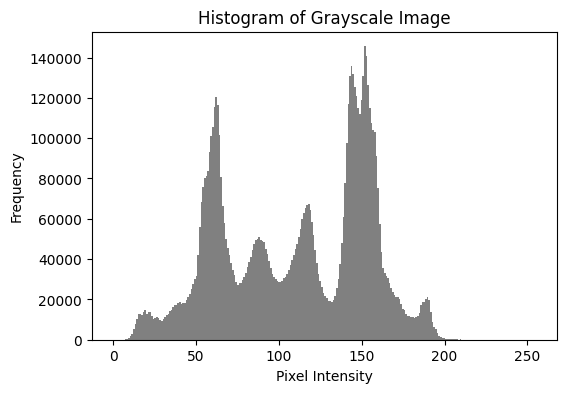

In [5]:
# Histogram Analysis

plt.figure(figsize=(6, 4))
hist, bins, _ = plt.hist(img_gray.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# Peaks and valleys:
# Peaks are intensity ranges with many pixels, valleys are ranges with few pixels.
# Threshold is often chosen at valleys to separate foreground and background.

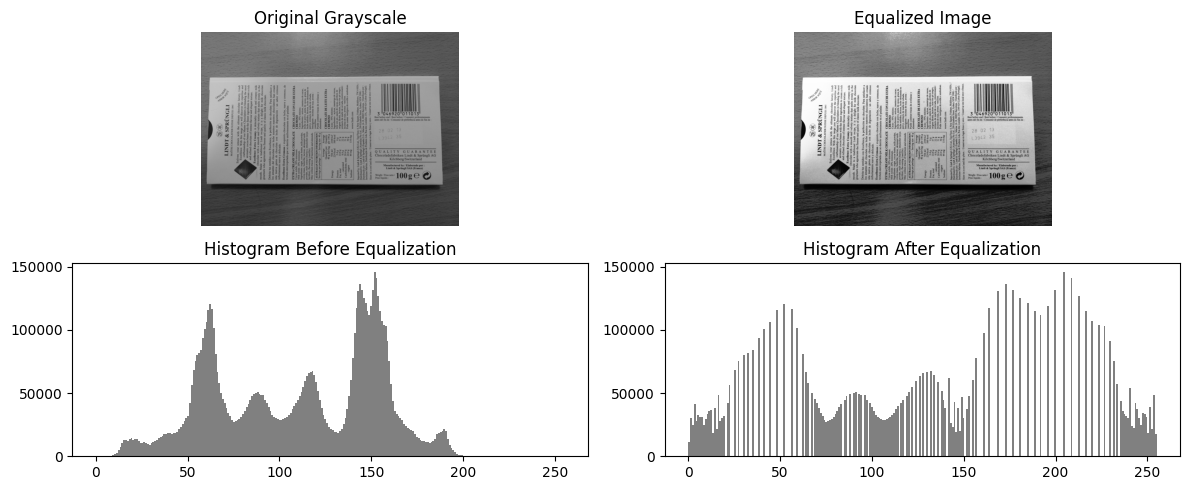

In [6]:
# Histogram Equalization

img_equalized = cv2.equalizeHist(img_gray)

# Display original vs equalized
plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_equalized, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

# Histograms before and after equalization
plt.subplot(2, 2, 3)
plt.hist(img_gray.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram Before Equalization")

plt.subplot(2, 2, 4)
plt.hist(img_equalized.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("Histogram After Equalization")
plt.tight_layout()
plt.show()